This notebook does exploratory data analysis and generates plots

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Data set gives total murders and total cleared for each city.  Non-granualar data

df_solves = pd.read_csv('UCR65_19.csv')
df_solves.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage


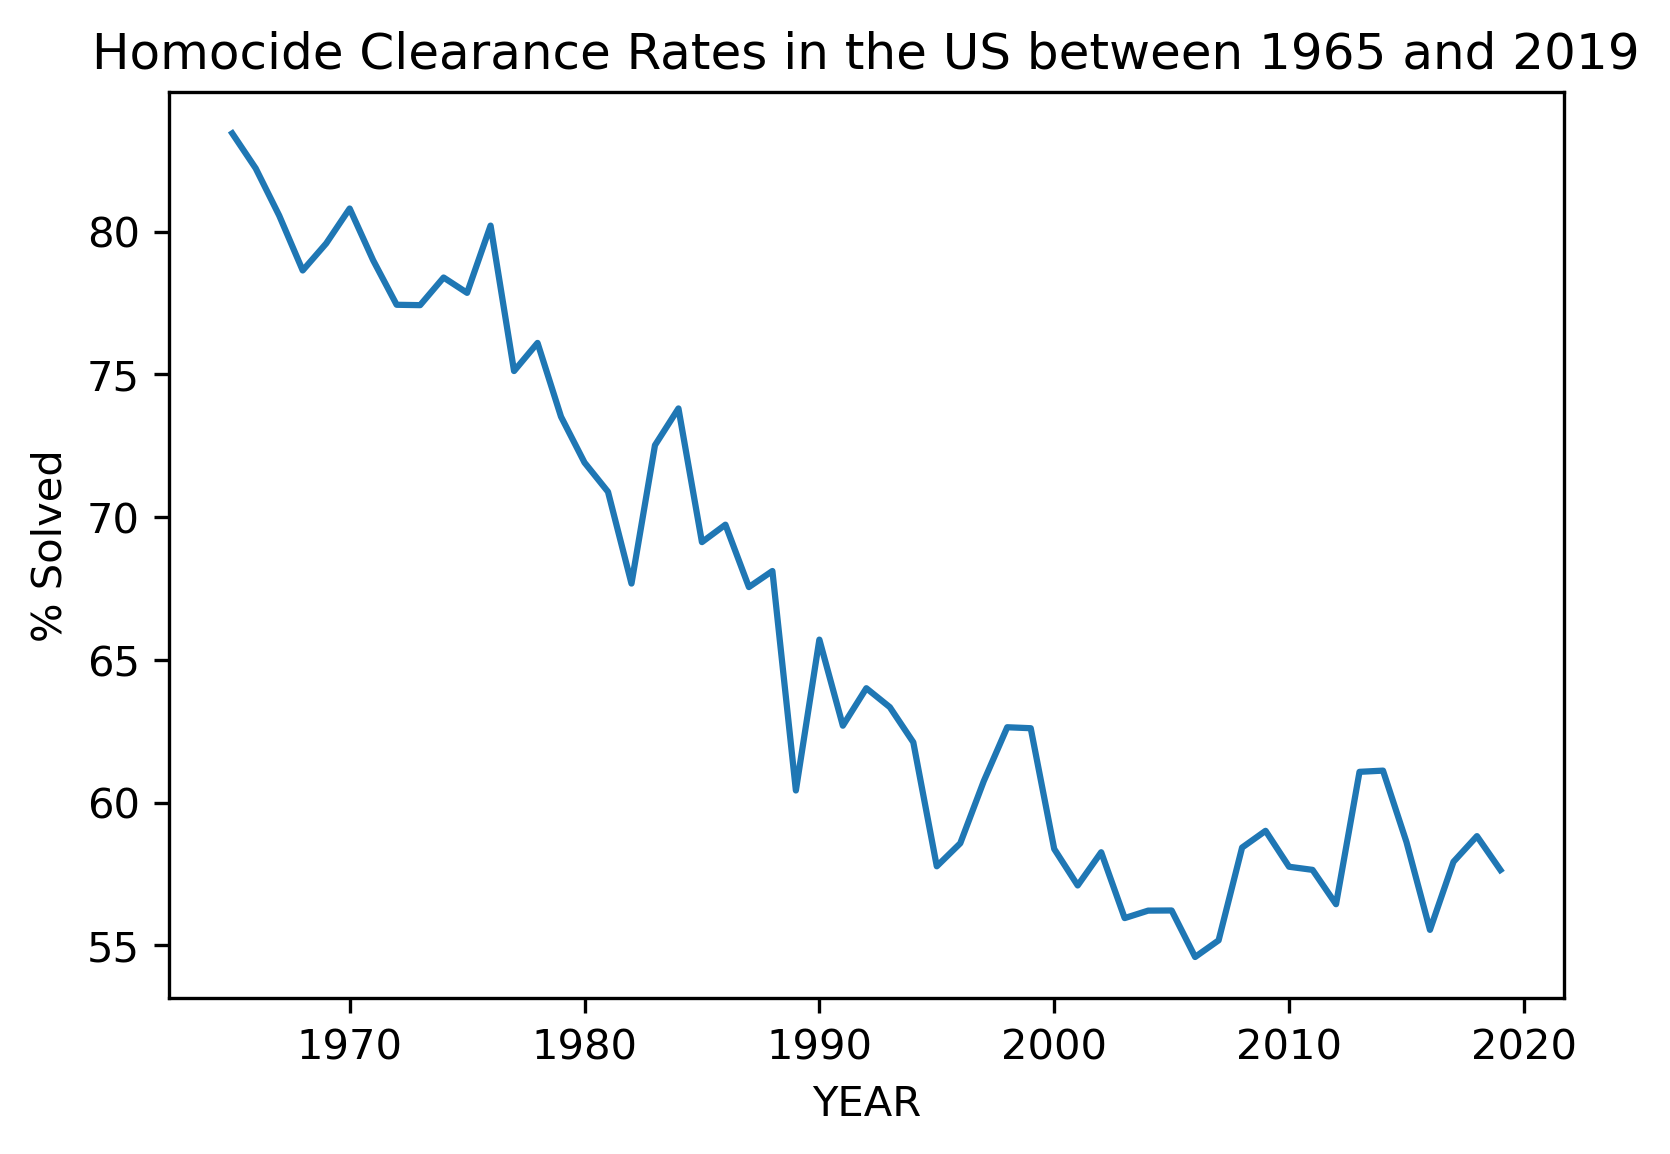

In [122]:
# Plots the murder solve percentage by year in the US
fig, ax = plt.subplots(1, 1,dpi = 300)
sns.lineplot(data = df_solves.groupby(['YEAR'])['CLR'].sum()/df_solves.groupby(['YEAR'])['MRD'].sum()*100);
ax.set_ylabel('% Solved');
ax.set_title('Homocide Clearance Rates in the US between 1965 and 2019');

In [115]:
# Finds the murder solve percentage in the US for 2004-2015
df_solves[(df_solves['YEAR']>2003) & (df_solves['YEAR']<2016)].groupby(['YEAR'])\
        ['CLR'].sum()/df_solves[(df_solves['YEAR']>2003) & (df_solves['YEAR']<2016)].groupby(['YEAR'])['MRD'].sum()*100


YEAR
2004    56.218364
2005    56.223733
2006    54.594627
2007    55.177762
2008    58.426756
2009    59.013583
2010    57.755368
2011    57.645523
2012    56.443125
2013    61.079203
2014    61.121885
2015    58.618699
dtype: float64

In [118]:
# Finds the murder solve percentage in the Boston
boston = df_solves[(df_solves['Agency'] == 'Boston') & (df_solves['State'] == 'Massachusetts')]
(boston.groupby(['YEAR'])['CLR'].sum()/boston.groupby(['YEAR'])['MRD'].sum()*100)

YEAR
1965    78.947368
1966    72.413793
1967    64.788732
1968    54.901961
1969    78.021978
1970    67.543860
1971    62.931034
1972    72.115385
1973    61.481481
1974    57.462687
1975    49.579832
1976    71.604938
1977    64.000000
1978    68.055556
1979    54.347826
1980    58.695652
1981    72.000000
1982    53.763441
1983    70.000000
1984    56.097561
1985    64.367816
1986    39.047619
1987    47.368421
1988    37.634409
1989    47.474747
1990    51.048951
1991    47.787611
1992    54.794521
1993    60.204082
1994    41.176471
1995    47.916667
1996    62.711864
1997    46.511628
1998    61.764706
1999    45.161290
2000    53.846154
2001    49.230769
2002    68.333333
2003    64.102564
2004    27.868852
2005    28.767123
2006    46.666667
2007    36.923077
2008    41.935484
2009    56.000000
2010    32.876712
2011    60.317460
2012    49.122807
2013    79.487179
2014    45.283019
2015    73.684211
2016    48.979592
2017    43.859649
2018    50.000000
2019    30.952381
dtype

In [22]:
# Makes a dataframe with murder solve percentages in Boston and US from 2004 through 2015.
# Relates to an article that suggests that greater resources results in higher solve rates.
d = {'Years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], 
     'US': [56, 56, 55, 55, 58, 59, 58, 58, 56, 61, 61, 59], 
     'Boston': [28, 29, 47, 37, 42, 56, 33, 60, 49, 79, 45, 74]}
braga = pd.DataFrame(data=d)

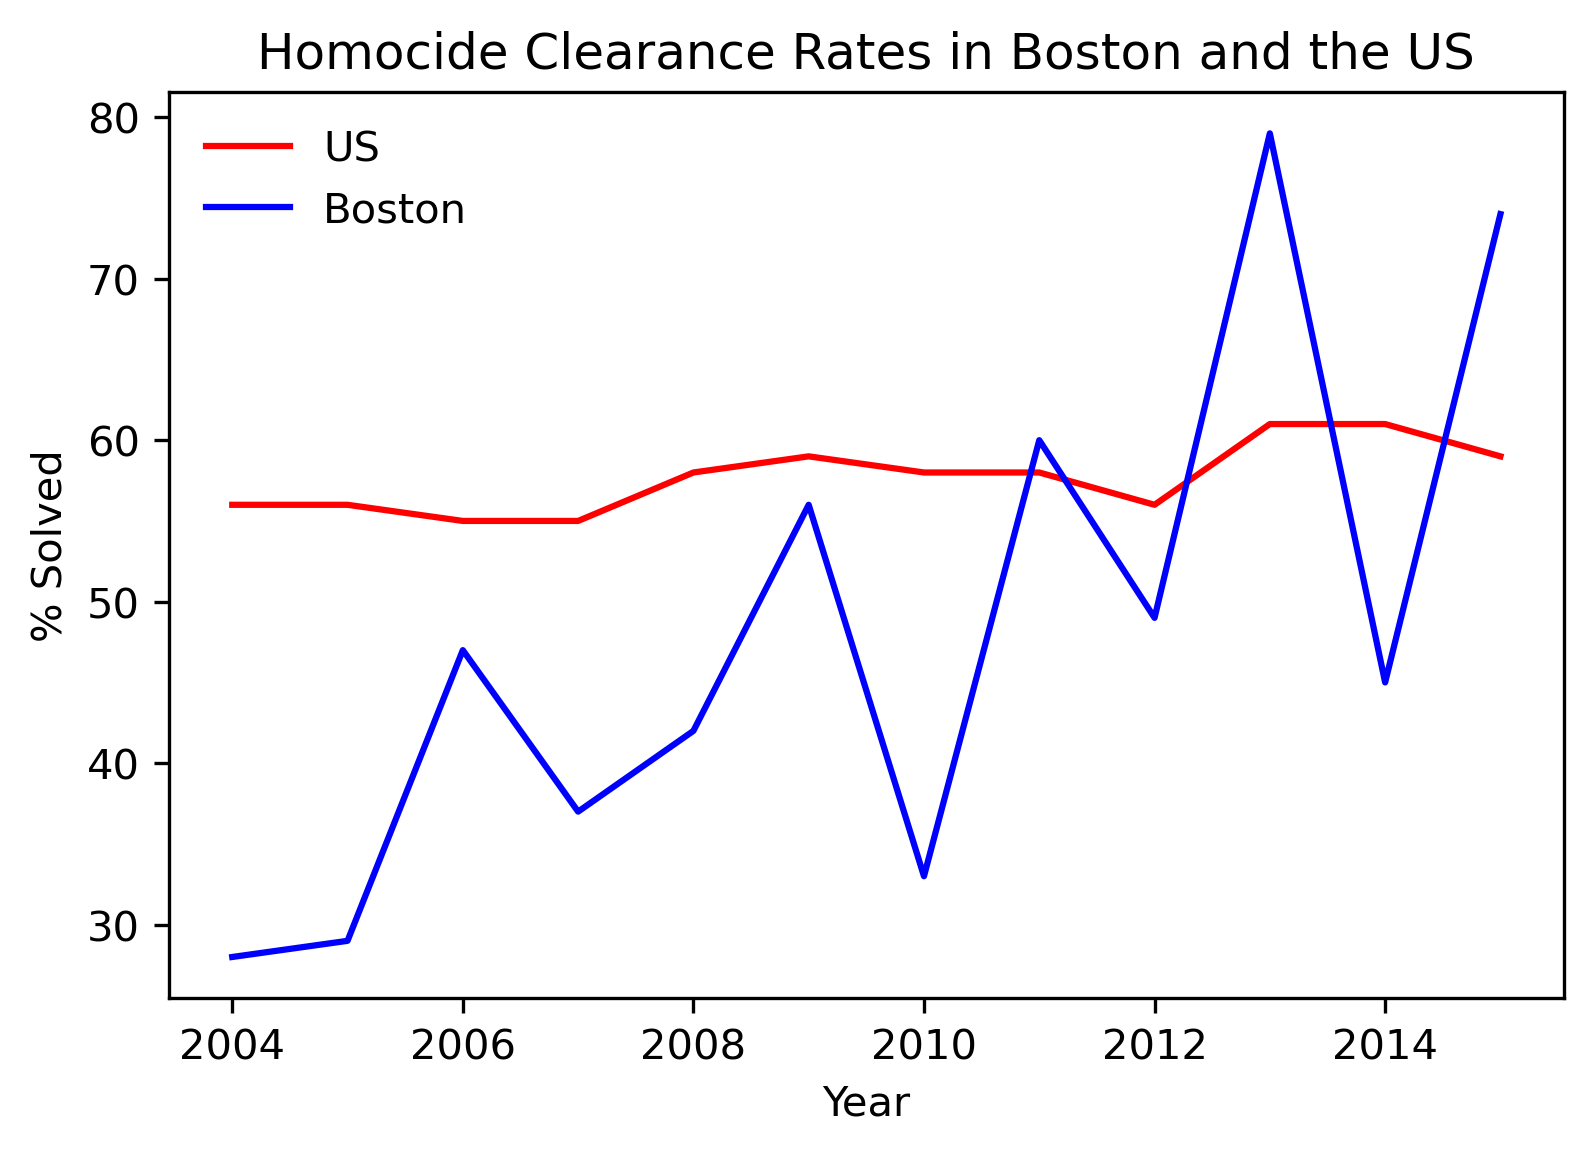

In [101]:
#Plost the data from the braga dataframe
fig, ax = plt.subplots(1, 1,dpi = 300)

sns.lineplot(data = braga, x = 'Years', y = 'US', color = 'r');
sns.lineplot(data = braga, x = 'Years', y = 'Boston', color = 'b');

ax.set_ylabel('% Solved');
ax.set_xlabel('Year');
ax.set_title('Homocide Clearance Rates in Boston and the US');
ax.legend(['US', 'Boston'], framealpha=0);
#plt.savefig('braga', transparent=True)

In [38]:
# Set solved as 1 and unsolved as 0.  Replace 999 with the mean age.
mean_age = df['VicAge'].mean()
df['Solved_nums'] = df['Solved'].replace(['Yes', 'No'],[1,0])
df['VicAge_mod'] = df['VicAge'].replace(999,mean_age)

In [41]:
#  Makes dummy variables for race, sex and ethnicity and adds them to the dataframe
df_dummies = pd.get_dummies(df[['VicRace', 'VicSex', 'VicEthnic']])
df_full = pd.concat([df, df_dummies], axis=1, sort=False)

In [42]:
df_full.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,VicRace_Black,VicRace_Native Hawaiian or Pacific Islander,VicRace_Unknown,VicRace_White,VicSex_Female,VicSex_Male,VicSex_Unknown,VicEthnic_Hispanic origin,VicEthnic_Not of Hispanic origin,VicEthnic_Unknown or not reported
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,0,0,0,0,0,1,0,0,0,1
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,1,0,0,0,0,1,0,0,0,1
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,1,0,0,0,1,0,0,0,0,1
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,1,0,0,0,0,1,0,0,0,1
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,0,0,0,1,0,1,0,0,0,1


In [120]:
# Gets percentages for victims for different races, ethnicities and sex.
demo = df_full[['VicRace_Black', 'VicRace_White', 'VicRace_Asian', 'VicEthnic_Hispanic origin', 'VicSex_Female', 'VicSex_Male', 'VicAge_mod']].mean()
print(demo)

VicRace_Black                 0.471037
VicRace_White                 0.496370
VicRace_Asian                 0.014330
VicEthnic_Hispanic origin     0.102960
VicSex_Female                 0.224322
VicSex_Male                   0.774031
VicAge_mod                   33.117730
dtype: float64


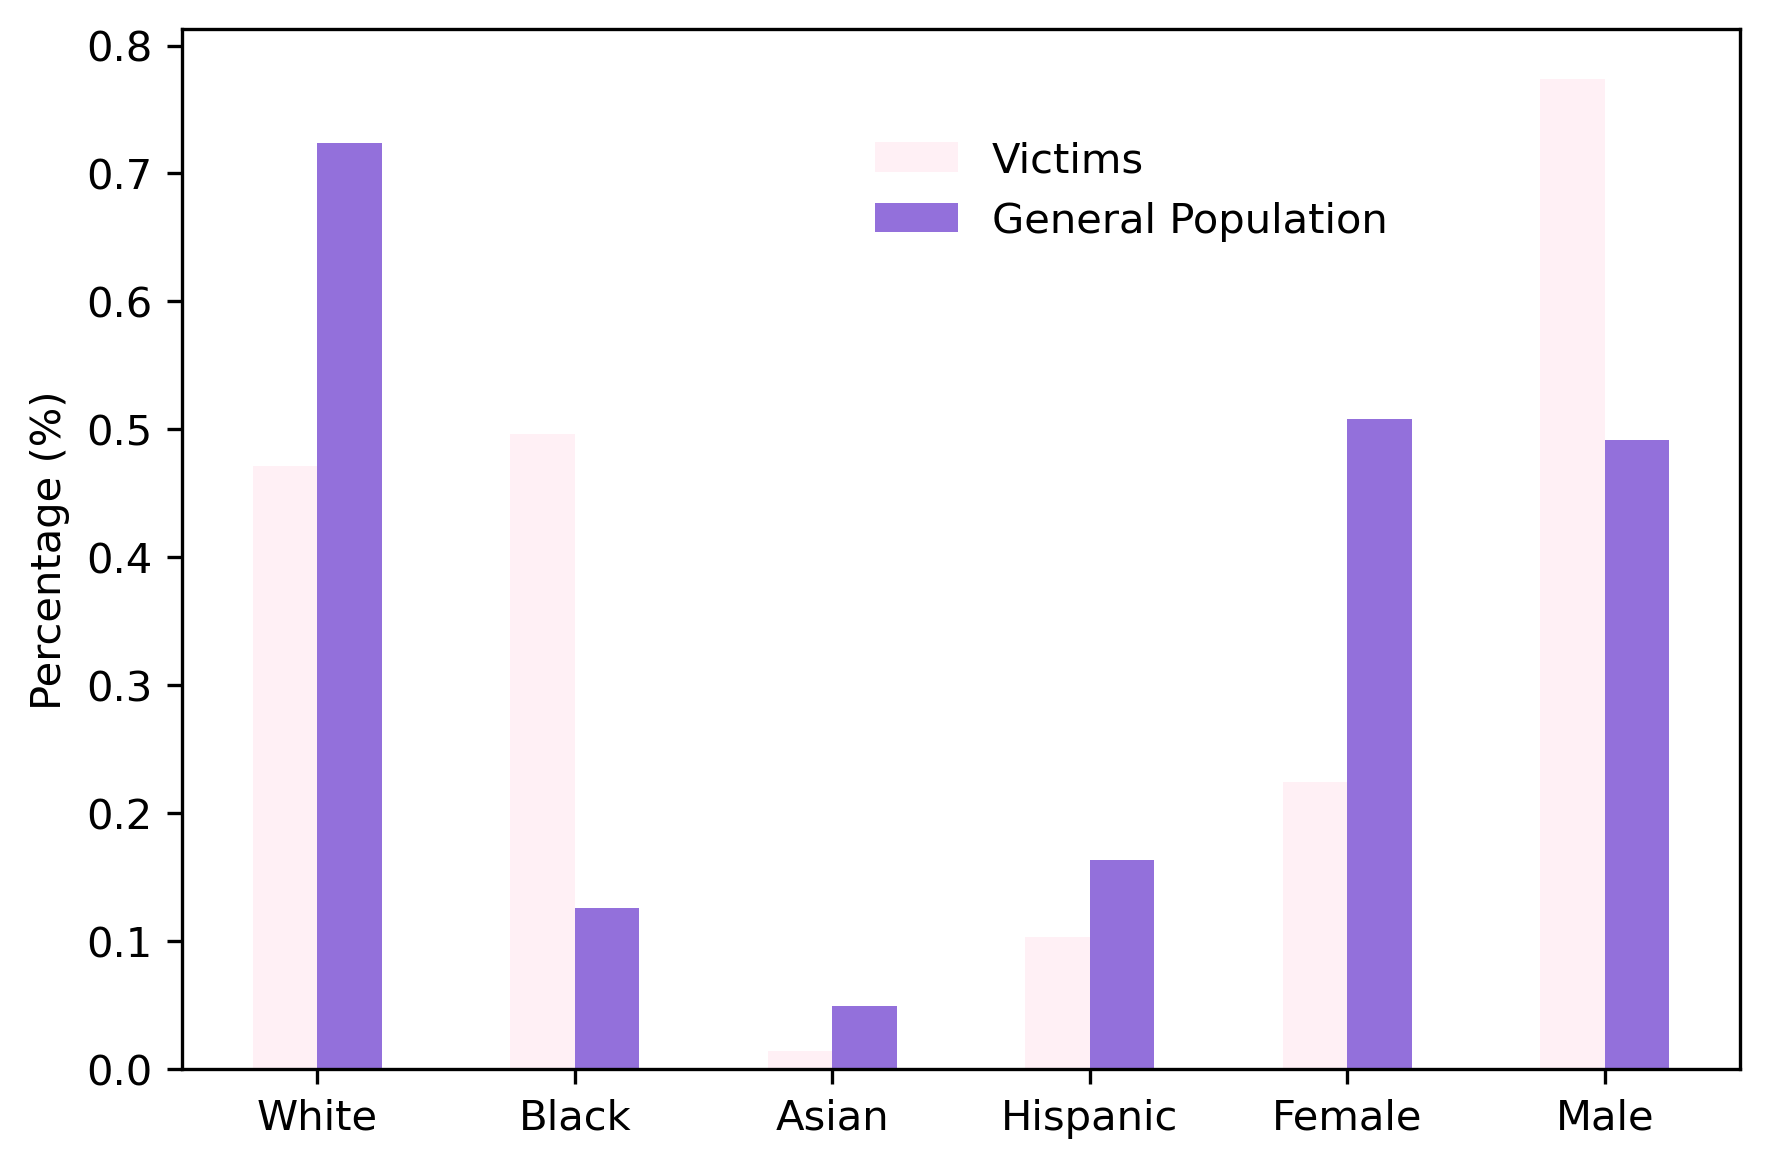

In [100]:
# Gets percentages for victims for different races, ethnicities and sex
# 22222
Victims = [0.496370, 0.471, 0.014330, 0.102960, 0.224322, 0.774031];
General = [.724, 0.126, 0.049, 0.163, 0.508, 0.492];
X = np.arange(6);
fig, ax = plt.subplots(1, 1,dpi = 300);
ax.bar(X + 0.00, Victims, color = 'lavenderblush', width = 0.25);
ax.bar(X + 0.25, General, color = 'mediumpurple', width = 0.25);
ax.set_xticks(X+.125)
ax.set_xticklabels(['White', 'Black', 'Asian','Hispanic', 'Female', 'Male'])
ax.set_ylabel('Percentage (%)');
fig.legend(['Victims', 'General Population'], framealpha=0, bbox_to_anchor=(.8,0.9));
plt.tight_layout();
plt.savefig('demo', transparent=True)